# K-Clustering of Scoring Efficiency from the 2021-2022 NBA Season

###### John Ajit, Connor Stallman

### About the Data

The dataset that we had chosen was various stats from the 2021-2022 NBA Season. A Kaggle Dataset, the data it includes is all NBA players including repeats from when players are traded or sign to new teams. Our hope in this analysis is to see how different players map out in terms of their overall scoring efficiency using their 2P% and 3P%. 

#### Importing Libraries and Loading the Data

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#Package for ignoring the warnings that may occur later!
import warnings
warnings.filterwarnings('ignore')

In [39]:
data = pd.read_csv("DataSets/2021-2022 NBA Player Stats - Edited.csv")

In [40]:
data

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,...,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,...,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,...,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,601,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,...,0.481,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3
808,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,0.904,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4
809,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,0.623,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3
810,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,0.776,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2


Hoping to get a better understanding of what the data really entails.

In [41]:
list(data.columns)

['Rk',
 'Player',
 'Pos',
 'Age',
 'Tm',
 'G',
 'GS',
 'MP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS']

Although there are a lot of useful columns in this dataset, we ultimately wanted to pull out the 2P%, 3P%. 

In [42]:
important_df_with_name = data[["Player", "PTS", "2P%", "3P%", "eFG%"]]
important_df = data[["2P%", "3P%"]]


In [43]:
important_df

,2P%,3P%
0,0.468,0.359
1,0.548,0.000
2,0.562,0.000
3,0.560,0.125
4,0.578,0.304
...,...,...
807,0.495,0.395
808,0.512,0.382
809,0.547,0.091
810,0.593,0.000


#### Using the Elbow Method

Below, we used the elbow method to find out how many clusters would be optimal for the data we had chosen. 

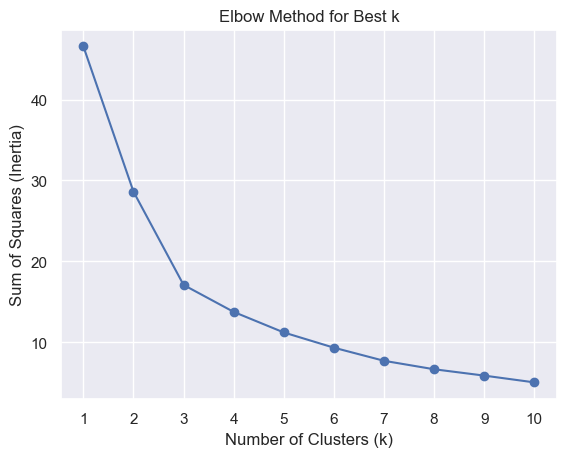

In [44]:
k_values_for_num_clust = range(1,11)

inertia_vals = []

for k in k_values_for_num_clust:
    kmean = KMeans(n_clusters = k, random_state = 12)
    kmean.fit(important_df)
    inertia_vals.append(kmean.inertia_)

plt.plot(k_values_for_num_clust, inertia_vals, marker = "o")
plt.title("Elbow Method for Best k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squares (Inertia)")
plt.xticks(k_values_for_num_clust)
plt.show()


The graph seems to level off and break at around 3-5 for the number of clusters. The break-off point appears to be 3 for clusters so that is the k-value we will choose. 

In [45]:
k = 3
kmeans = KMeans(n_clusters = k, random_state = 12)
clusters = kmeans.fit_predict(important_df)
col_names = ["2P%", "3P%"]

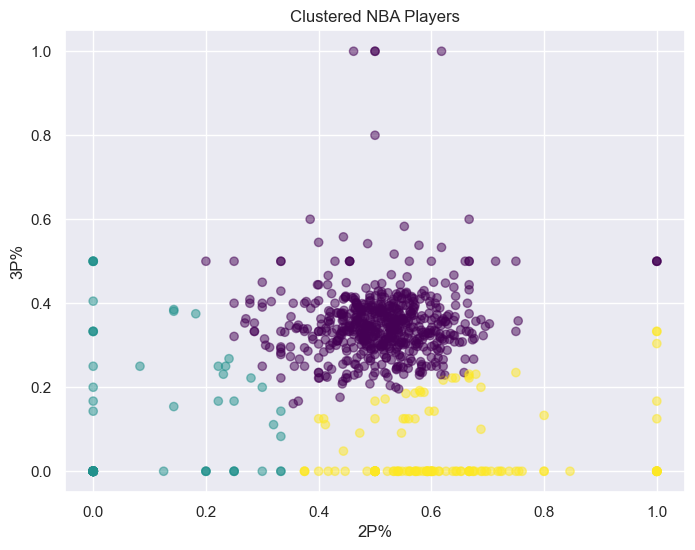

In [46]:
plt.figure(figsize = (8,6))
plt.scatter(important_df["2P%"], important_df["3P%"], c = clusters, cmap = "viridis", alpha = 0.5)
plt.title("Clustered NBA Players")
plt.xlabel("2P%")
plt.ylabel("3P%")
plt.grid(True)
plt.show()

After looking at the graph, we were interested in finding the centroids of each cluster and seeing where some popular players would fall under with regard to each cluster.

#### Finding Centroid of each Cluster

In [47]:
centroid = kmeans.cluster_centers_
print("Centroids:")
for c, cent in enumerate(centroid):
    print(f'Cluster {c + 1}: {cent}')

Centroids:
Cluster 1: [0.51087333 0.35077667]
Cluster 2: [0.076275  0.0975125]
Cluster 3: [0.63412121 0.04759091]


Plotting the graph, visualizing where the centroids of the clusters lie:

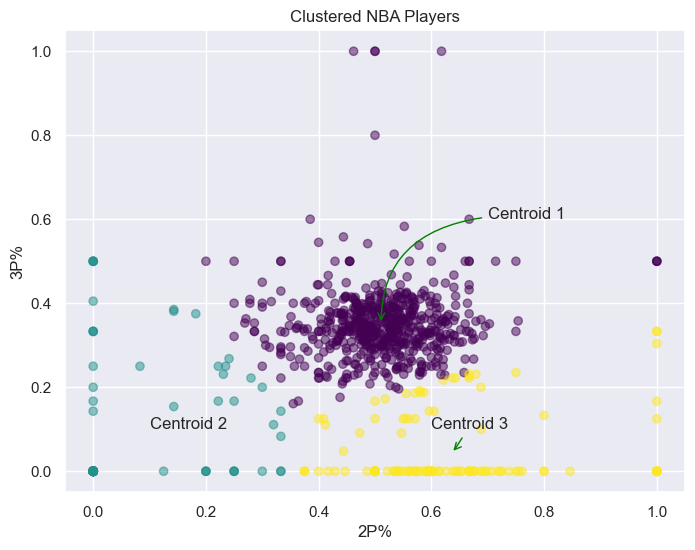

In [48]:
plt.figure(figsize = (8,6))
plt.scatter(important_df["2P%"], important_df["3P%"], c = clusters, cmap = "viridis", alpha = 0.5)
plt.title("Clustered NBA Players")
plt.xlabel("2P%")
plt.ylabel("3P%")
plt.annotate("Centroid 1",xy=(0.51087333 , 0.35077667), xytext = (0.7, 0.6), arrowprops=dict(arrowstyle="->", color = "green", connectionstyle="angle3,angleA=0,angleB=-90"))
plt.annotate("Centroid 2",xy=(0.076275,0.0975125), xytext = (0.1, 0.1))
plt.annotate("Centroid 3",xy=(0.63412121,0.04759091), xytext = (0.6, 0.1), arrowprops=dict(arrowstyle="->", color = "green", connectionstyle="angle3,angleA=60,angleB=-90"))
plt.grid(True)
plt.show()

We wanted to see where some of our favorite players landed on this list. We decided to check out Joel Embiid and Steph Curry, two of the best players from our favorite teams. 

In [49]:
embiid = important_df_with_name.loc[important_df_with_name['Player'] == 'Joel Embiid']
curry = important_df_with_name.loc[important_df_with_name['Player'] == 'Stephen Curry']
print(embiid)
print(curry)

          Player   PTS    2P%    3P%   eFG%
206  Joel Embiid  30.6  0.529  0.371  0.534
            Player   PTS    2P%   3P%   eFG%
159  Stephen Curry  25.5  0.527  0.38  0.554


As can be seen in the data points, Steph Curry and Joel Embiid would fall in our first cluster, as many players have. This can be attributed to a plethora of reasons, one of which being how the game has greatly evolved. Both generational players, but playing different positions, excel at scoring both inside and outside the paint, showing how well they succeed in the NBA due to them also having a high PPG.

### Conclusion

With the data above, we were able to apply the k-means clustering algorithm which assigned our players to one of three clusters based on how they performed during the 2021-2022 NBA season and their FG% broken down into 2P% and 3P%. This can be useful for General Managers and coaches as they can see how to best utilize their players depending on which cluster they fall under or which they are projected to fall under. If they were to fall under the first cluster, they would considered a jack of all trades, players who can score on the inside and could be considered as 3-point threats as well. If they were to fall in that second cluster, they may be better as 3 point specialists. That last cluster would be the post guys and players who are physical and able to efficiently score inside the paint. Overall, our project serves as a guide for understanding where players fall in terms of their overall offensive effiency on the court. For next time, we would be very interested in finding a dataset which includes the location of where players score inside the court and apply this same clustering algorithm there. Finding out from how many feet or from which location players are most effective from would be an interesting next step from our project so far!